# Modelo Procesos de Flujo

Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definir Funciones

### Definir intervalos

In [2]:
delta_v = 0.05

v_i = 1.0
v_f = 5.0
v_1 = 1.5
v_2 = 3.5

### Proceso isotérmico

Para la presión de un gas ideal

In [3]:
R = 1
T = 1

def pressure(v):
    return R*T / v

### Proceso adiabático

Cuando el calor transferido es 0

In [4]:
C_p = 5 / 3
C_v = 2 / 3
gamma = C_p / C_v
P_2 = pressure(v_2)

def pressure_adiab(v):
    return P_2*np.power(v_2/v, gamma)

### Proceso politrópico

Caso general cuando la capacidad calorífica es constante

In [5]:
C = - 3 / 2
n = (C_p - C) / (C_v - C)
P_2 = pressure(v_2)

def pressure_poli(v):
    return P_2*np.power(v_2/v, n)

### Graficar

Graficar isoterma y áreas de trabajo

In [6]:
P_1 = pressure(v_1)
P_2 = pressure(v_2)
v = np.linspace(v_i, v_f)
P = pressure(v)
P_ad = pressure_adiab(v)
P_poli = pressure_poli(v)

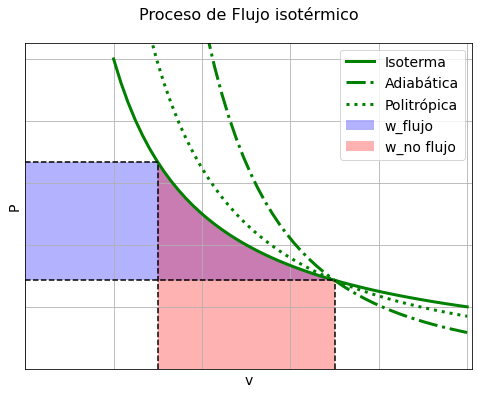

In [7]:
_, ax = plt.subplots(figsize=(8, 6))

ax.plot(v, P, 'g', linewidth=3, label="Isoterma")
ax.plot(v, P_ad, '-.g', linewidth=3, label="Adiabática")
ax.plot(v, P_poli, ':g', linewidth=3, label="Politrópica")
ax.fill_between(np.linspace(0, v_1), P_1, P_2, facecolor='b', alpha=0.3, label="w_flujo")
mini_v = np.linspace(v_1, v_2)
ax.fill_between(mini_v, 0, P_2, facecolor='r', alpha=0.3, label="w_no flujo")
ax.fill_between(mini_v, P_2, pressure(mini_v), facecolor='b', alpha=0.3)
ax.fill_between(mini_v, P_2, pressure(mini_v), facecolor='r', alpha=0.3)
ax.plot([0, v_1], [P_1, P_1], '--k')
ax.plot([0, v_2], [P_2, P_2], '--k')
ax.plot([v_1, v_1], [0, P_1], '--k')
ax.plot([v_2, v_2], [0, P_2], '--k')
ax.set_xlim(0, v_f + delta_v)
ax.set_ylim(0, pressure(v_i - delta_v))
ax.set_title("Proceso de Flujo isotérmico\n", fontsize=16)
ax.set_xlabel("v", fontsize=14)
ax.set_ylabel("P", fontsize=14)
ax.tick_params(
    which='both',
    bottom=False,
    top=False,
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False)
ax.grid()
ax.legend(fontsize=14)

plt.savefig("Matplotlib/proc_flujo.png")